### Problem and Objective
##### You are a cab rental start-up company. You have successfully run the pilot project and now want to launch your cab service across the country. You have collected the historical data from your pilot project and now have a requirement to apply analytics for fare prediction. You need to design a system that predicts the fare amount for a cab ride in the city.

In [288]:
# import required libraries
import pandas as pd                  # for performing EDA
import numpy as np                   # for Linear Algebric operations
import matplotlib.pyplot as plt      # for Data Visualization
import seaborn as sns                # for Data Visualization
import os                            # getting access to input files
from collections import Counter
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# working directory
os.chdir("F:/edWisor/Cab_Fare_Prediction_Project")

In [289]:
# loading data
train  = pd.read_csv("train_cab.csv", sep=",")
test   = pd.read_csv("test_cab.csv", sep=",")

In [290]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [291]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [292]:
train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [293]:
test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [294]:
# checking size of train data
train.shape

(16067, 7)

In [295]:
# checking size of test data
test.shape

(9914, 6)

In [296]:
train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [297]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


### Data cleaning, missing value and outlier analysis

In [298]:
# changing datatype of pickup_datetime variable from object to datetime
train['pickup_datetime'] =  pd.to_datetime(train['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')

In [299]:
print(train['pickup_datetime'].isnull().sum())

1


In [300]:
# one value is null in pickup_datetime variable, so drop it.
train = train.drop(train[train['pickup_datetime'].isnull()].index, axis=0)

In [301]:
train.shape

(16066, 7)

In [302]:
# separate the pickup_datetime column into separate fields like year, month,day, day of the week, hour etc.
train['year'] = train['pickup_datetime'].dt.year
train['Month'] = train['pickup_datetime'].dt.month
train['Date'] = train['pickup_datetime'].dt.day
train['Day'] = train['pickup_datetime'].dt.dayofweek
train['Hour'] = train['pickup_datetime'].dt.hour
train['Minute'] = train['pickup_datetime'].dt.minute

In [303]:
train.dtypes

fare_amount                  object
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [304]:
# checking null values
print(train['pickup_datetime'].isnull().sum())
print(train['year'].isnull().sum())
print(train['Month'].isnull().sum())
print(train['Date'].isnull().sum())
print(train['Day'].isnull().sum())
print(train['Hour'].isnull().sum())
print(train['Minute'].isnull().sum())

0
0
0
0
0
0
0


In [305]:
# for test data
# changing datatype of pickup_datetime variable from object to datetime
test['pickup_datetime'] =  pd.to_datetime(test['pickup_datetime'], format='%Y-%m-%d %H:%M:%S UTC', errors='coerce')

In [306]:
# separate the pickup_datetime column into separate fields like year, month,day, day of the week, hour etc.
test['year'] = test['pickup_datetime'].dt.year
test['Month'] = test['pickup_datetime'].dt.month
test['Date'] = test['pickup_datetime'].dt.day
test['Day'] = test['pickup_datetime'].dt.dayofweek
test['Hour'] = test['pickup_datetime'].dt.hour
test['Minute'] = test['pickup_datetime'].dt.minute

In [307]:
test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [308]:
# checking null values
print(test['pickup_datetime'].isnull().sum())
print(test['year'].isnull().sum())
print(test['Month'].isnull().sum())
print(test['Date'].isnull().sum())
print(test['Day'].isnull().sum())
print(test['Hour'].isnull().sum())
print(test['Minute'].isnull().sum())

0
0
0
0
0
0
0


In [309]:
# Checking the fare_amount variable
#Converting fare_amount variable from object to numeric
train["fare_amount"] = pd.to_numeric(train["fare_amount"], errors = "coerce")

In [310]:
train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
year                          int64
Month                         int64
Date                          int64
Day                           int64
Hour                          int64
Minute                        int64
dtype: object

In [311]:
train["fare_amount"].describe()

count    16041.000000
mean        15.015223
std        430.474362
min         -3.000000
25%          6.000000
50%          8.500000
75%         12.500000
max      54343.000000
Name: fare_amount, dtype: float64

In [312]:
# sort fare_amount in decending order to check outliers
train["fare_amount"].sort_values(ascending=False)

1015    54343.0
1072     4343.0
607       453.0
980       434.0
1335      180.0
         ...   
1712        NaN
2412        NaN
2458        NaN
8178        NaN
8226        NaN
Name: fare_amount, Length: 16066, dtype: float64

In [313]:
# from above, we can see that there is huge difference in first three values of fare_amount
# first two values seems to be outlier in fare_amount, so drop them
train = train.drop(train[train["fare_amount"]> 454].index, axis=0)

In [314]:
train.shape

(16064, 13)

In [315]:
Counter(train["fare_amount"]<=0)

Counter({False: 16060, True: 4})

In [316]:
# in fare_amount variable there are 4 values are present where fare is negative or zero. so drop them
train = train.drop(train[train["fare_amount"]<=0].index, axis=0)
train.shape

(16060, 13)

In [317]:
print(train['fare_amount'].isnull().sum())

25


In [318]:
# there are 25 rows which includes null fare_amount value. so drop those 25 rows
train = train.drop(train[train['fare_amount'].isnull()].index, axis=0)
train.shape

(16035, 13)

In [319]:
# Checking the passenger_count variable
train["passenger_count"].describe()

count    15980.000000
mean         2.623693
std         60.903563
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [320]:
# any cab can not have more than 6 passengers, so we are dropping rows which includes more than 6 passengers
train = train.drop(train[train["passenger_count"]> 6].index, axis=0)

In [321]:
train.shape

(16016, 13)

In [322]:
Counter(train["passenger_count"]==0)

Counter({False: 15959, True: 57})

In [323]:
#there are 57 rows in which passenger_count is 0. the cab should have atleast 1 passenger. so drop rows having 0 passenger.
train = train.drop(train[train["passenger_count"] == 0].index, axis=0)

In [324]:
train.shape

(15959, 13)

In [325]:
# sort passenger_count in ascending order
train["passenger_count"].sort_values(ascending=True)

8862     0.12
0        1.00
9797     1.00
9798     1.00
9801     1.00
         ... 
8076      NaN
8139      NaN
8259      NaN
8306      NaN
16066     NaN
Name: passenger_count, Length: 15959, dtype: float64

In [326]:
# 1 row includes passenger_count is 0.12 which is not possible. so drop that row
train = train.drop(train[train["passenger_count"] == 0.12].index, axis=0)

In [327]:
print(train['passenger_count'].isnull().sum())

55


In [328]:
# there are 55 rows which includes null passenger_count value. so drop those 55 rows
train = train.drop(train[train['passenger_count'].isnull()].index, axis=0)
train.shape

(15903, 13)

In [329]:
test["passenger_count"].describe()

count    9914.000000
mean        1.671273
std         1.278747
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         6.000000
Name: passenger_count, dtype: float64

In [330]:
print(test['passenger_count'].isnull().sum())

0


In [331]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
count,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000,15903.000000
mean,11.375641,-72.475079,39.921495,-72.465336,39.899371,1.649645,2011.730868,6.264919,15.669811,3.034459,13.494246,29.655411
std,10.814944,10.538127,6.817244,10.566052,6.186041,1.265811,1.866810,3.447058,8.685896,1.968644,6.521489,17.299538
min,0.010000,-74.438233,-74.006893,-74.429332,-74.006377,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992143,40.734946,-73.991181,40.734715,1.000000,2010.000000,3.000000,8.000000,1.000000,9.000000,15.000000
50%,8.500000,-73.981689,40.752640,-73.980157,40.753565,1.000000,2012.000000,6.000000,16.000000,3.000000,14.000000,30.000000
75%,12.500000,-73.966801,40.767382,-73.963643,40.768027,2.000000,2013.000000,9.000000,23.000000,5.000000,19.000000,45.000000
max,453.000000,40.766125,401.083332,40.802437,41.366138,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


In [332]:
# from above, it is clear that max. value of pickup_latitude is 401.0833
# As we know that Lattitude ranges from (-90 to 90) and Longitude ranges from (-180 to 180)
# So, drop the rows which includes values outside the Lattitude and Longitude ranges

In [333]:
# dropping one value of >90
train = train.drop((train[train['pickup_latitude']< -90]).index, axis=0)
train = train.drop((train[train['pickup_latitude']> 90]).index, axis=0)

In [334]:
train.shape

(15902, 13)

In [335]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273,2011.815816,6.857979,16.194170,2.852834,13.467420,29.548416
std,0.042774,0.033541,0.039072,0.035435,1.278747,1.803347,3.353272,8.838482,1.994451,6.868584,18.674818
min,-74.252193,40.573143,-74.263242,40.568973,1.000000,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000,2010.000000,4.000000,9.000000,1.000000,8.000000,13.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000,2012.000000,7.000000,16.000000,3.000000,15.000000,33.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000,2014.000000,10.000000,25.000000,5.000000,19.000000,45.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000,2015.000000,12.000000,31.000000,6.000000,23.000000,59.000000


##### we have given pickup/drop latitude and longitude, so we need to calculate the distance using haversine formula

In [336]:
# function for calculating the distance using haversine formula.
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [337]:
train['distance'] = train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [338]:
test['distance'] = test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [339]:
train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,2009,6,15,0,17,26,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,2010,1,5,1,16,52,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,2011,8,18,3,0,35,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,2012,4,21,5,4,30,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,2010,3,9,1,7,51,1.999157


In [340]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,Month,Date,Day,Hour,Minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,1,13,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,1,13,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,5,11,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,5,21,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,5,21,12,5.387301


In [341]:
train['distance'].describe()

count    15902.000000
mean        15.070783
std        311.732401
min          0.000000
25%          1.215750
50%          2.125950
75%          3.851269
max       8667.542104
Name: distance, dtype: float64

In [342]:
Counter(train['distance'] == 0)

Counter({False: 15448, True: 454})

In [343]:
# distance can not be 0 km, so drop the rows which includes distance 0 km
train = train.drop(train[train['distance']== 0].index, axis=0)
train.shape

(15448, 14)

In [344]:
# arrange decending order of distance to check outlier
train['distance'].sort_values(ascending=False)[0:40]

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
9899       97.670590
4487       95.852036
9808       93.925599
7401       92.605848
12349      43.648755
649        39.476975
6308       37.812945
4118       32.602535
7021       29.478280
6677       26.369072
Name: distance, dtype: float64

In [345]:
# from above, it is clear that first 23 distance values are outliers as in first 23 values, distance is in thousands.
# And after first 23 values, distance goes down to 129 km
# remove the rows whose distance values is very high which is more than 129 km
train = train.drop(train[train['distance'] > 130].index, axis=0)
train.shape

(15425, 14)

In [346]:
test['distance'].describe()

count    9914.000000
mean        3.435371
std         3.972374
min         0.000000
25%         1.298277
50%         2.217412
75%         4.045302
max        99.996040
Name: distance, dtype: float64

In [347]:
Counter(test['distance'] == 0)

Counter({False: 9829, True: 85})

In [348]:
# distance can not be 0 km, so drop the rows which includes distance 0 km
test = test.drop(test[test['distance']== 0].index, axis=0)
test.shape

(9829, 13)

In [349]:
test['distance'].sort_values(ascending=False)

4080    99.996040
8529    98.192419
5887    97.240975
7269    33.604366
4334    28.837177
          ...    
7966     0.007370
6230     0.003598
6901     0.002657
2513     0.002166
352      0.001486
Name: distance, Length: 9829, dtype: float64

##### we have splitted the pickup date time variable into different variables like month, year, day etc and we have created distance using pickup and drop longitudes and latitudes so we will drop pickup date time, pickup and drop longitudes and latitudes variables.

In [350]:
train_col_drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Minute']
train = train.drop(train_col_drop, axis = 1)

In [351]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,4.5,1.0,2009,6,15,0,17,1.030764
1,16.9,1.0,2010,1,5,1,16,8.450134
2,5.7,2.0,2011,8,18,3,0,1.389525
3,7.7,1.0,2012,4,21,5,4,2.799270
4,5.3,1.0,2010,3,9,1,7,1.999157


In [352]:
train.dtypes

fare_amount        float64
passenger_count    float64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [353]:
train['passenger_count'] = train['passenger_count'].astype('int64')
train.dtypes

fare_amount        float64
passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [354]:
train.isnull().sum()

fare_amount        0
passenger_count    0
year               0
Month              0
Date               0
Day                0
Hour               0
distance           0
dtype: int64

In [355]:
train.shape

(15425, 8)

In [356]:
test_col_drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'Minute']
test = test.drop(test_col_drop, axis = 1)

In [357]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance
0,1,2015,1,27,1,13,2.323259
1,1,2015,1,27,1,13,2.425353
2,1,2011,10,8,5,11,0.618628
3,1,2012,12,1,5,21,1.961033
4,1,2012,12,1,5,21,5.387301


In [358]:
test.dtypes

passenger_count      int64
year                 int64
Month                int64
Date                 int64
Day                  int64
Hour                 int64
distance           float64
dtype: object

In [359]:
test.isnull().sum()

passenger_count    0
year               0
Month              0
Date               0
Day                0
Hour               0
distance           0
dtype: int64

In [360]:
test.shape

(9829, 7)

In [361]:
#taking copy of the data

train_data_df1 = train.copy()
test_data_df1 = test.copy()

#train = train_data_df1.copy()
#test = test_data_df1.copy()

#### boxplot and scatter plot analysis for outlier detection

{'whiskers': [<matplotlib.lines.Line2D at 0x7f685dfbd828>,
 'caps': [<matplotlib.lines.Line2D at 0x7f685dfbdeb8>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f685dfbd518>],
 'medians': [<matplotlib.lines.Line2D at 0x7f685dfb6588>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f685dfb68d0>],
 'means': []}

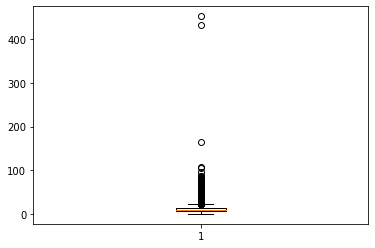

In [362]:
# checking boxplot of continous variables

%matplotlib inline
plt.boxplot(train['fare_amount'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7f685df2d5c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f685df2dc50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f685df2d2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f685df53320>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f685df53668>],
 'means': []}

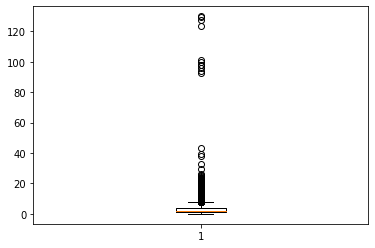

In [363]:
# checking boxplot of continous variables
plt.boxplot(train['distance'])

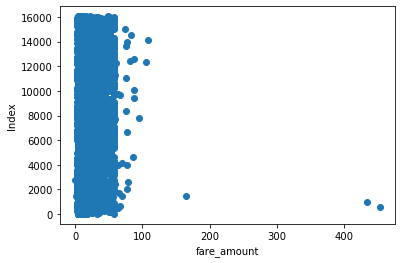

In [364]:
# scatter plot on continous variables

plt.scatter(x=train.fare_amount, y=train.index)
plt.ylabel('Index')
plt.xlabel('fare_amount')
plt.show()

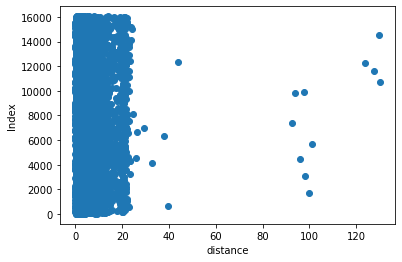

In [365]:
# scatter plot on continous variables

plt.scatter(x=train.distance, y=train.index)
plt.ylabel('Index')
plt.xlabel('distance')
plt.show()

##### from above scatter plots, it is clear that fare greater than 80 is outlier and distance greater than 30 km is outlier. so, drop the rows which includes fare greater than 80 and distance greater than 30 km.

In [366]:
train = train.drop(train[train['fare_amount'] > 80].index, axis=0)
train.shape

(15413, 8)

In [367]:
train = train.drop(train[train['distance'] > 30].index, axis=0)
train.shape

(15399, 8)

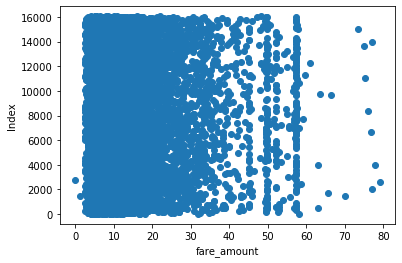

In [368]:
# scatter plot on continous variables after removing outlier

plt.scatter(x=train.fare_amount, y=train.index)
plt.ylabel('Index')
plt.xlabel('fare_amount')
plt.show()

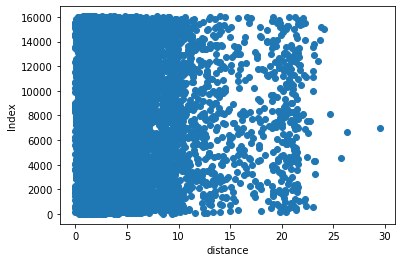

In [369]:
# scatter plot on continous variables after removing outlier

plt.scatter(x=train.distance, y=train.index)
plt.ylabel('Index')
plt.xlabel('distance')
plt.show()

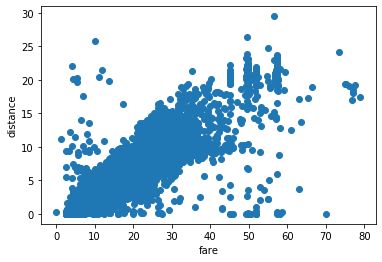

In [370]:
#Plot for fare_amount variation across distance

plt.scatter(y=train['distance'], x=train['fare_amount'])
plt.xlabel('fare')
plt.ylabel('distance')
plt.show()

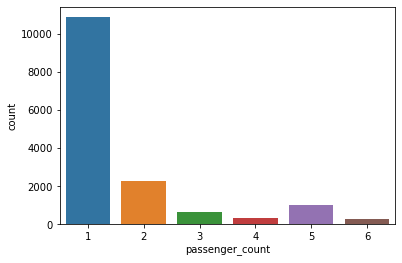

In [371]:
# Count plot on passenger count

sns.countplot(train['passenger_count'])

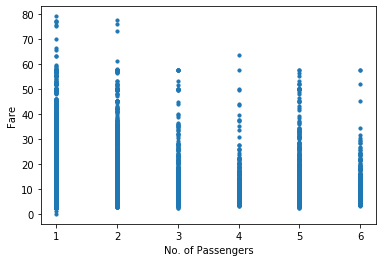

In [372]:
# check relationship between fare and passengers

plt.scatter(x=train['passenger_count'], y=train['fare_amount'], s=10)
plt.xlabel('No. of Passengers')
plt.ylabel('Fare')
plt.show()

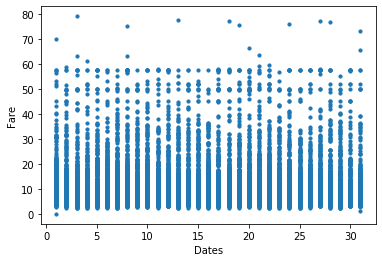

In [373]:
# check relationship between fare and date

plt.scatter(x=train['Date'], y=train['fare_amount'], s=10)
plt.xlabel('Dates')
plt.ylabel('Fare')
plt.show()

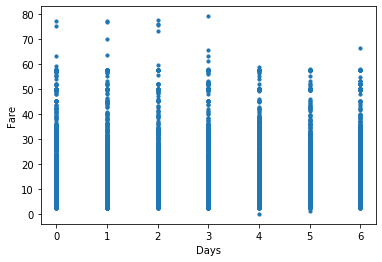

In [374]:
# check relationship between fare and day

plt.scatter(x=train['Day'], y=train['fare_amount'], s=10)
plt.xlabel('Days')
plt.ylabel('Fare')
plt.show()

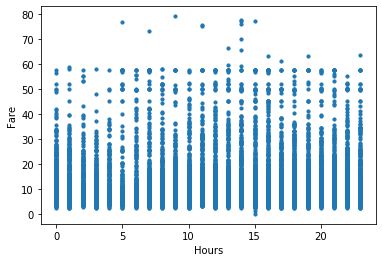

In [375]:
# check relationship between fare and hour

plt.scatter(x=train['Hour'], y=train['fare_amount'], s=10)
plt.xlabel('Hours')
plt.ylabel('Fare')
plt.show()

### Feature Selection

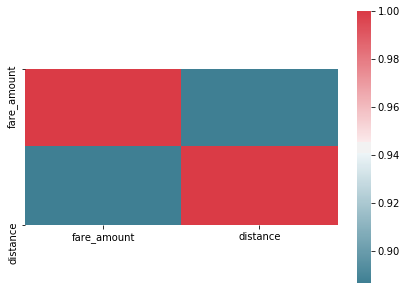

In [376]:
# Correlation Analysis
# generating heatmap

cnames = ['fare_amount', 'distance']
df_corr = train.loc[:,cnames]
f, ax = plt.subplots(figsize=(7, 5))

# correlation matrix
corr = df_corr.corr()

sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax)

In [377]:
# checking VIF for multicolinerity

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

VIF_df = add_constant(train.iloc[:,1:8])
pd.Series([variance_inflation_factor(VIF_df.values, i) 
               for i in range(VIF_df.shape[1])], 
              index=VIF_df.columns)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const              1.174942e+06
passenger_count    1.002393e+00
year               1.015236e+00
Month              1.015122e+00
Date               1.001269e+00
Day                1.010604e+00
Hour               1.010584e+00
distance           1.003526e+00
dtype: float64

In [378]:
#taking copy of the data

train_data_df2 = train.copy()
test_data_df2 = test.copy()

#train = train_data_df2.copy()
#test = test_data_df2.copy()

##### from above VIF values are less than 10 for each variable, so there is no multicolinerity exists.

### Feature Scaling

(array([1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 4.000e+01, 6.200e+01,
        1.920e+02, 6.700e+02, 6.460e+02, 7.410e+02, 1.246e+03, 7.960e+02,
        7.410e+02, 7.370e+02, 1.016e+03, 6.490e+02, 6.070e+02, 7.970e+02,
        4.860e+02, 4.260e+02, 5.650e+02, 3.810e+02, 2.990e+02, 2.930e+02,
        5.020e+02, 2.260e+02, 1.810e+02, 2.130e+02, 1.550e+02, 1.390e+02,
        2.040e+02, 1.410e+02, 1.210e+02, 1.020e+02, 1.160e+02, 9.000e+01,
        7.300e+01, 9.800e+01, 6.900e+01, 6.200e+01, 8.100e+01, 7.100e+01,
        4.000e+01, 4.300e+01, 5.000e+01, 4.000e+01, 4.600e+01, 4.400e+01,
        4.000e+01, 4.500e+01, 4.700e+01, 3.500e+01, 2.600e+01, 2.200e+01,
        4.100e+01, 2.900e+01, 1.700e+01, 2.900e+01, 3.300e+01, 2.200e+01,
        3.800e+01, 2.300e+01, 2.200e+01, 2.300e+01, 3.500e+01, 2.400e+01,
        1.400e+01, 2.300e+01, 2.200e+01, 1.700e+01, 1.100e+01, 1.100e+01,
        1.000e+01, 8.000e+00, 1.400e+01, 1.300e+01, 9.000e+00, 7.000e+00,
        6.000e+00, 7.000e+00, 1.000e+0

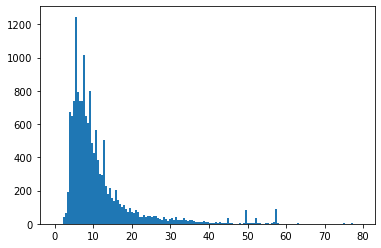

In [379]:
# check histogram of fare_amount variable

plt.hist(train['fare_amount'], bins='auto')

(array([1.390e+02, 2.000e+02, 5.130e+02, 8.180e+02, 1.050e+03, 1.111e+03,
        1.041e+03, 9.280e+02, 9.040e+02, 7.760e+02, 6.920e+02, 6.320e+02,
        5.970e+02, 5.080e+02, 4.490e+02, 3.760e+02, 3.570e+02, 3.360e+02,
        2.540e+02, 2.490e+02, 2.520e+02, 2.020e+02, 1.960e+02, 1.810e+02,
        1.720e+02, 1.360e+02, 1.340e+02, 1.110e+02, 1.220e+02, 1.190e+02,
        9.600e+01, 9.800e+01, 8.300e+01, 5.800e+01, 6.800e+01, 5.900e+01,
        5.500e+01, 4.400e+01, 5.200e+01, 4.700e+01, 4.800e+01, 5.100e+01,
        5.200e+01, 6.300e+01, 5.400e+01, 6.500e+01, 5.600e+01, 3.300e+01,
        3.800e+01, 3.600e+01, 2.100e+01, 2.200e+01, 2.900e+01, 2.300e+01,
        2.100e+01, 1.300e+01, 1.500e+01, 1.500e+01, 2.000e+01, 1.400e+01,
        1.600e+01, 1.800e+01, 1.000e+01, 1.200e+01, 1.500e+01, 1.200e+01,
        1.400e+01, 1.400e+01, 1.100e+01, 4.000e+00, 8.000e+00, 8.000e+00,
        7.000e+00, 4.000e+00, 1.300e+01, 8.000e+00, 4.000e+00, 9.000e+00,
        5.000e+00, 6.000e+00, 7.000e+0

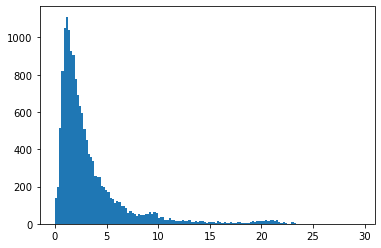

In [380]:
# check histogram of distance variable

plt.hist(train['distance'], bins='auto')

In [381]:
# performing normalization

cnames = ['fare_amount', 'distance']
for i in cnames:
    print(i)
    train[i] = (train[i] - train[i].min())/(train[i].max() - train[i].min())

fare_amount
distance


In [382]:
train.head()

,fare_amount,passenger_count,year,Month,Date,Day,Hour,distance
0,0.056843,1,2009,6,15,0,17,0.034963
1,0.213825,1,2010,1,5,1,16,0.286654
2,0.072034,2,2011,8,18,3,0,0.047134
3,0.097354,1,2012,4,21,5,4,0.094957
4,0.066971,1,2010,3,9,1,7,0.067814


## Models Development

In [383]:
# split train data into train and test
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,1:8], train.iloc[:,0], test_size = 0.2, random_state = 1)

In [384]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12319, 7)
(3080, 7)
(12319,)
(3080,)


### Linear Regression Model

In [385]:
# Build model on train data
LR = LinearRegression().fit(X_train , y_train)

In [386]:
# predict on train data
pred_train_LR = LR.predict(X_train)

In [387]:
# predict on test data
pred_test_LR = LR.predict(X_test)

In [388]:
# Model Evaluation

# calculate RMSE on train data
RMSE_train_LR= np.sqrt(mean_squared_error(y_train, pred_train_LR))

# calculate RMSE on test data
RMSE_test_LR = np.sqrt(mean_squared_error(y_test, pred_test_LR))

In [389]:
print("RMSE on training data = "+str(RMSE_train_LR))
print("RMSE on test data = "+str(RMSE_test_LR))

RMSE on training data = 0.052256416549892305
RMSE on test data = 0.05209296672134858


In [390]:
# calculate R^2 on train data
r2_train_LR = r2_score(y_train, pred_train_LR)

# calculate R^2 on test data
r2_test_LR = r2_score(y_test, pred_test_LR)

In [391]:
print("r2 on training data = "+str(r2_train_LR))
print("r2 on test data = "+str(r2_test_LR))

r2 on training data = 0.7967162830547573
r2 on test data = 0.7996915170530652


### Decision Tree Model

In [392]:
# Build model on train data
DT = DecisionTreeRegressor(max_depth = 2).fit(X_train, y_train)

In [393]:
# predict on train data
pred_train_DT = DT.predict(X_train)

# predict on test data
pred_test_DT = DT.predict(X_test)

In [394]:
# Model Evaluation

# calculate RMSE on train data
RMSE_train_DT = np.sqrt(mean_squared_error(y_train, pred_train_DT))

# calculate RMSE on test data
RMSE_test_DT = np.sqrt(mean_squared_error(y_test, pred_test_DT))

In [395]:
print("RMSE on training data = "+str(RMSE_train_DT))
print("RMSE on test data = "+str(RMSE_test_DT))

RMSE on training data = 0.05882202678524862
RMSE on test data = 0.0595765542682677


In [396]:
# calculate R^2 on train data
r2_train_DT = r2_score(y_train, pred_train_DT)

# calculate R^2 on test data
r2_test_DT = r2_score(y_test, pred_test_DT)

In [397]:
print("r2 on training data = "+str(r2_train_DT))
print("r2 on test data = "+str(r2_test_DT))

r2 on training data = 0.7424252350137317
r2 on test data = 0.7380056525207052


### Random Forest Model

In [398]:
# Build model on train data
RF = RandomForestRegressor(n_estimators = 300).fit(X_train, y_train)

In [399]:
# predict on train data
pred_train_RF = RF.predict(X_train)

# predict on test data
pred_test_RF = RF.predict(X_test)

In [400]:
# Model Evaluation

# calculate RMSE on train data
RMSE_train_RF = np.sqrt(mean_squared_error(y_train, pred_train_RF))

# calculate RMSE on test data
RMSE_test_RF = np.sqrt(mean_squared_error(y_test, pred_test_RF))

In [401]:
print("RMSE on training data = "+str(RMSE_train_RF))
print("RMSE on test data = "+str(RMSE_test_RF))

RMSE on training data = 0.0188235582953822
RMSE on test data = 0.053362956566434236


In [402]:
# calculate R^2 on train data
r2_train_RF = r2_score(y_train, pred_train_RF)

# calculate R^2 on test data
r2_test_RF = r2_score(y_test, pred_test_RF)

In [403]:
print("r2 on training data = "+str(r2_train_RF))
print("r2 on test data = "+str(r2_test_RF))

r2 on training data = 0.9736229155518966
r2 on test data = 0.7898057041771843


### Gradient Boosting

In [404]:
# Build model on train data
GB = GradientBoostingRegressor().fit(X_train, y_train)

In [405]:
# predict on train data
pred_train_GB = GB.predict(X_train)

# predict on test data
pred_test_GB = GB.predict(X_test)

In [406]:
# Model Evaluation

# calculate RMSE on train data
RMSE_train_GB = np.sqrt(mean_squared_error(y_train, pred_train_GB))

# calculate RMSE on test data
RMSE_test_GB = np.sqrt(mean_squared_error(y_test, pred_test_GB))

In [407]:
print("RMSE on training data = "+str(RMSE_train_GB))
print("RMSE on test data = "+str(RMSE_test_GB))

RMSE on training data = 0.04283819595073212
RMSE on test data = 0.05221474459579668


In [408]:
# calculate R^2 on train data
r2_train_GB = r2_score(y_train, pred_train_GB)

# calculate R^2 on test data
r2_test_GB = r2_score(y_test, pred_test_GB)

In [409]:
print("r2 on training data = "+str(r2_train_GB))
print("r2 on test data = "+str(r2_test_GB))

r2 on training data = 0.8633889940883133
r2 on test data = 0.7987538989912932


## Applying Hyper-parameter Tuning for optimizing the results

##### there are two ways to apply hyper-parameter tuning
##### 1. RandomizedSearchCV
##### 2. GridSearchCV

In [410]:
# 1. RandomizedSearchCV

from sklearn.model_selection import RandomizedSearchCV

# RandomizedSearchCV on Random Forest Model

RFR = RandomForestRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator, 'max_depth': depth}

randomcv_rf = RandomizedSearchCV(RFR, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_rf = randomcv_rf.fit(X_train, y_train)
predictions_RFR = randomcv_rf.predict(X_test)

best_params_RFR = randomcv_rf.best_params_

best_estimator_RFR = randomcv_rf.best_estimator_

predictions_RFR = best_estimator_RFR.predict(X_test)

# calculate R^2
RFR_r2 = r2_score(y_test, predictions_RFR)

# calculate RMSE
RFR_rmse = np.sqrt(mean_squared_error(y_test, predictions_RFR))

print('RandomizedSearchCV - Random Forest Regressor Model Performance:')
print('Best Parameters = ',best_params_RFR)
print('R-squared = {:0.2}.'.format(RFR_r2))
print('RMSE = ',RFR_rmse)

RandomizedSearchCV - Random Forest Regressor Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.79.
RMSE =  0.05360261946279395


In [411]:
# RandomizedSearchCV on gradient boosting model

GBR = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(1,20,2))
depth = list(range(1,100,2))

# Create the random grid
rand_grid = {'n_estimators': n_estimator, 'max_depth': depth}

randomcv_gb = RandomizedSearchCV(GBR, param_distributions = rand_grid, n_iter = 5, cv = 5, random_state=0)
randomcv_gb = randomcv_gb.fit(X_train, y_train)
predictions_gb = randomcv_gb.predict(X_test)

best_params_gb = randomcv_gb.best_params_

best_estimator_gb = randomcv_gb.best_estimator_

predictions_gb = best_estimator_gb.predict(X_test)

# calculate R^2
gb_r2 = r2_score(y_test, predictions_gb)

# calculate RMSE
gb_rmse = np.sqrt(mean_squared_error(y_test, predictions_gb))

print('RandomizedSearchCV - Gradient Boosting Model Performance:')
print('Best Parameters = ',best_params_gb)
print('R-squared = {:0.2}.'.format(gb_r2))
print('RMSE = ', gb_rmse)

RandomizedSearchCV - Gradient Boosting Model Performance:
Best Parameters =  {'n_estimators': 15, 'max_depth': 9}
R-squared = 0.75.
RMSE =  0.0579931618343988


In [412]:
# 2. GridSearchCV

from sklearn.model_selection import GridSearchCV

# GridSearchCV on Random Forest Model

rfr_gs = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf = GridSearchCV(rfr_gs, param_grid = grid_search, cv = 5)
gridcv_rf = gridcv_rf.fit(X_train,y_train)

best_params_GRF = gridcv_rf.best_params_
best_estimator_GRF = gridcv_rf.best_estimator_

#Apply model on test data
predictions_GRF = best_estimator_GRF.predict(X_test)

# calculate R^2
GRF_r2 = r2_score(y_test, predictions_GRF)

# calculate RMSE
GRF_rmse = np.sqrt(mean_squared_error(y_test, predictions_GRF))

print('GridSearchCV - Random Forest Regressor Model Performance:')
print('Best Parameters = ',best_params_GRF)
print('R-squared = {:0.2}.'.format(GRF_r2))
print('RMSE = ',(GRF_rmse))

GridSearchCV - Random Forest Regressor Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.8.
RMSE =  0.05243106129916764


In [413]:
# GridSearchCV on gradient boosting model

gbr_gs = GradientBoostingRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

# Grid Search Cross-Validation with 5 fold CV
gridcv_gb = GridSearchCV(gbr_gs, param_grid = grid_search, cv = 5)
gridcv_gb = gridcv_gb.fit(X_train,y_train)

best_params_Ggb = gridcv_gb.best_params_
best_estimator_Ggb = gridcv_gb.best_estimator_

#Apply model on test data
predictions_Ggb = best_estimator_Ggb.predict(X_test)

# calculate R^2
Ggb_r2 = r2_score(y_test, predictions_Ggb)

# calculate RMSE
Ggb_rmse = np.sqrt(mean_squared_error(y_test, predictions_Ggb))

print('Grid Search CV Gradient Boosting regression Model Performance:')
print('Best Parameters = ',best_params_Ggb)
print('R-squared = {:0.2}.'.format(Ggb_r2))
print('RMSE = ',(Ggb_rmse))

Grid Search CV Gradient Boosting regression Model Performance:
Best Parameters =  {'max_depth': 5, 'n_estimators': 19}
R-squared = 0.78.
RMSE =  0.05445782146149547


##### from above models, it is clear that GridSearchCV on Random Forest Model is providing best results having R-squared = 0.8 and RMSE =  0.05243

## Fare prediction on the Test data

##### we have already cleaned the test dataset, so we are applying GridSearchCV on Random Forest Model on Test data.
##### Let's create standalone model on entire training dataset.

In [414]:
train = train_data_df2.copy()

In [415]:
X = train.drop('fare_amount', axis=1).values
y = train['fare_amount'].values

In [416]:
print(X.shape)
print(y.shape)

(15399, 7)
(15399,)


In [417]:
# GridSearchCV for random Forest model - test data fare prediction

rfr_test = RandomForestRegressor(random_state = 0)
n_estimator = list(range(11,20,1))
depth = list(range(5,15,2))

# Create the grid
grid_search = {'n_estimators': n_estimator, 'max_depth': depth}

## Grid Search Cross-Validation with 5 fold CV
gridcv_rf_test = GridSearchCV(rfr_test, param_grid = grid_search, cv = 5)
gridcv_rf_test = gridcv_rf_test.fit(X, y)

best_params_GRF_test = gridcv_rf_test.best_params_
best_estimator_GRF_test = gridcv_rf_test.best_estimator_

# Apply model on test data
predictions_GRF_test = best_estimator_GRF_test.predict(test)

print('Best Parameters = ',best_params_GRF_test)

Best Parameters =  {'max_depth': 7, 'n_estimators': 19}


In [418]:
predictions_GRF_test

array([ 9.83590464, 10.38009932,  5.00253711, ..., 45.68500105,
       23.89626051,  6.02304042])

In [419]:
test['Predicted_fare'] = predictions_GRF_test

In [420]:
test.head()

,passenger_count,year,Month,Date,Day,Hour,distance,Predicted_fare
0,1,2015,1,27,1,13,2.323259,9.835905
1,1,2015,1,27,1,13,2.425353,10.380099
2,1,2011,10,8,5,11,0.618628,5.002537
3,1,2012,12,1,5,21,1.961033,7.878283
4,1,2012,12,1,5,21,5.387301,15.531962


In [421]:
test.to_csv('test_predicted.csv')